In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
data = pd.read_csv("train_data")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Wrangling

In [3]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002587,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data[data.isna().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N


# Observations
### Numerical features:
    ApplicantIncome:
    CoapplicantIncome:
    LoanAmount: Missing
    
### Catogorical features:
    Gender: Missing
    Married: Missing
    Credit_History: Missing
    Property_Area:
    Loan_Status:
    Loan_Amount_Term: Missing
    
### Ordinal features:
    Dependents: Missing
    Education:
    Self_Employed: Missing
    

### Dealing with Missing values

In [8]:
data['Gender'].fillna(data['Gender'].value_counts().index[0],inplace=True)
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [9]:
data['Married'].fillna(data['Married'].value_counts().index[0],inplace=True)
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [10]:
data['Dependents'].fillna(data['Dependents'].value_counts().index[0],inplace=True)
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
data['Self_Employed'].fillna(data['Self_Employed'].value_counts().index[0],inplace=True)
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['LoanAmount'].isna().sum()

0

In [13]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Loan_Amount_Term'].isna().sum()

0

In [14]:
data['Credit_History'].fillna(data['Credit_History'].value_counts().index[0],inplace=True)
data['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

## Univariate Analysis

Y    422
N    192
Name: Loan_Status, dtype: int64
col_0           count
Loan_Status          
N            0.312704
Y            0.687296
AxesSubplot(0.125,0.125;0.775x0.755)


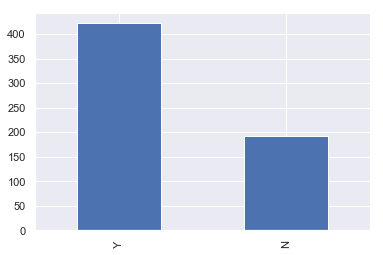

In [15]:
print(data['Loan_Status'].value_counts())
print(pd.crosstab(index=data['Loan_Status'],columns='count',normalize=True))
print(data['Loan_Status'].value_counts().plot.bar())

##### --> The loan of 422(around 69%) people out of 614 was approved.

In [16]:
print(data['Gender'].value_counts())
print(pd.crosstab(index=data['Gender'],columns='count',normalize=True))

Male      502
Female    112
Name: Gender, dtype: int64
col_0     count
Gender         
Female  0.18241
Male    0.81759


In [17]:
print(data['Married'].value_counts())
print(pd.crosstab(index=data['Married'],columns='count',normalize=True))

Yes    401
No     213
Name: Married, dtype: int64
col_0       count
Married          
No       0.346906
Yes      0.653094


In [18]:
print(data['Self_Employed'].value_counts())
print(pd.crosstab(index=data['Self_Employed'],columns='count',normalize=True))

No     532
Yes     82
Name: Self_Employed, dtype: int64
col_0            count
Self_Employed         
No             0.86645
Yes            0.13355


In [19]:
print(data['Credit_History'].value_counts())
print(pd.crosstab(index=data['Credit_History'],columns='count',normalize=True))

1.0    525
0.0     89
Name: Credit_History, dtype: int64
col_0              count
Credit_History          
0.0             0.144951
1.0             0.855049


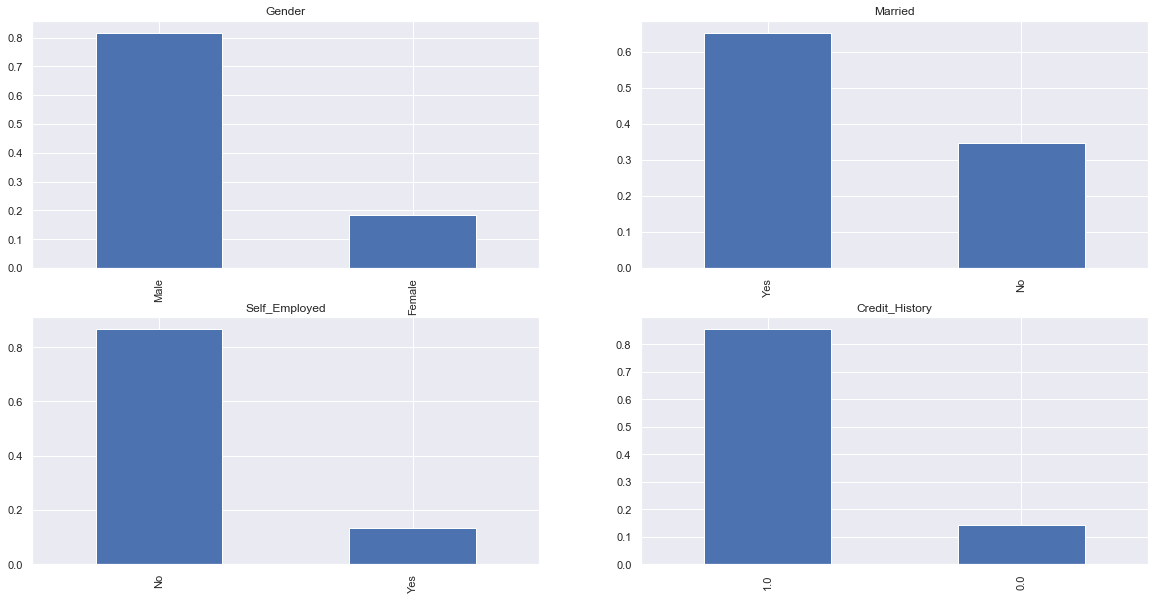

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(221) 
data['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender') 
plt.subplot(222) 
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

##### --> 81% applicants in the dataset are male.
##### --> Around 65% of the applicants in the dataset are married.
##### --> Around 13% applicants in the dataset are self employed.
##### --> Around 85% applicants have repaid their debts.

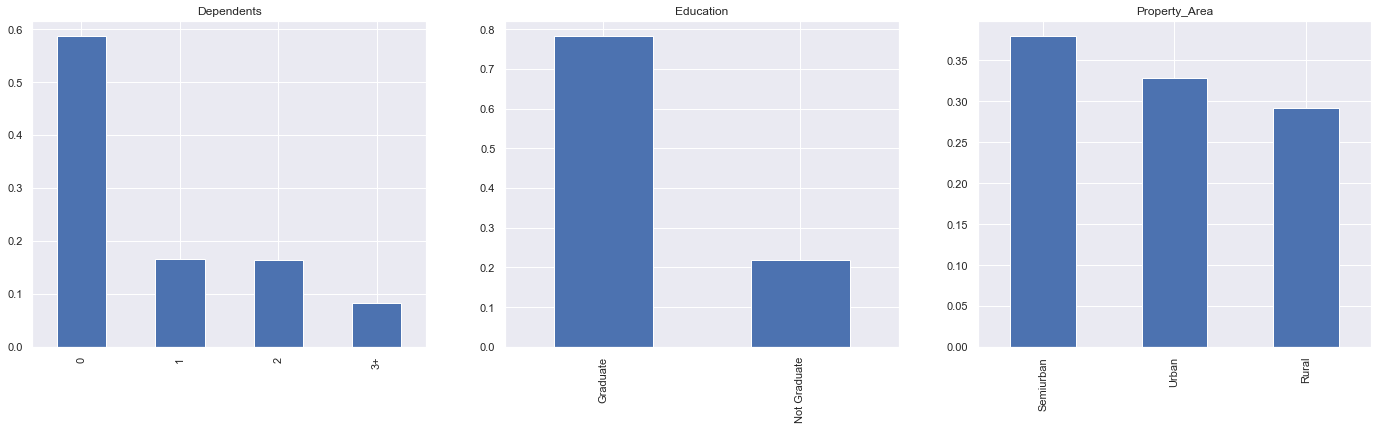

In [21]:
plt.figure(figsize=(24,6)) 
plt.subplot(131) 
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents') 
plt.subplot(132) 
data['Education'].value_counts(normalize=True).plot.bar(title='Education') 
plt.subplot(133) 
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area') 

##### --> Most of the applicants don’t have any dependents.
##### --> Around 80% of the applicants are Graduate.
##### --> Most of the applicants are from Semiurban area.

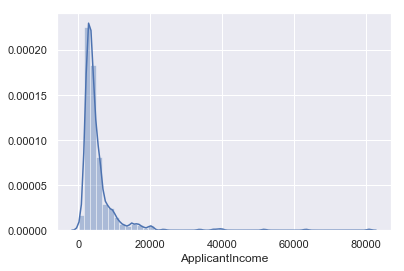

In [22]:
sns.distplot(data['ApplicantIncome']) 

##### --> Applicant Income data is not normally distributed since most of the data is towards left.

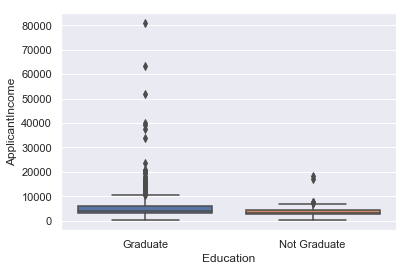

In [23]:
sns.boxplot(y='ApplicantIncome',x='Education',data=data)

##### --> There are a higher number of graduates with very high incomes, which are appearing to be the outliers.

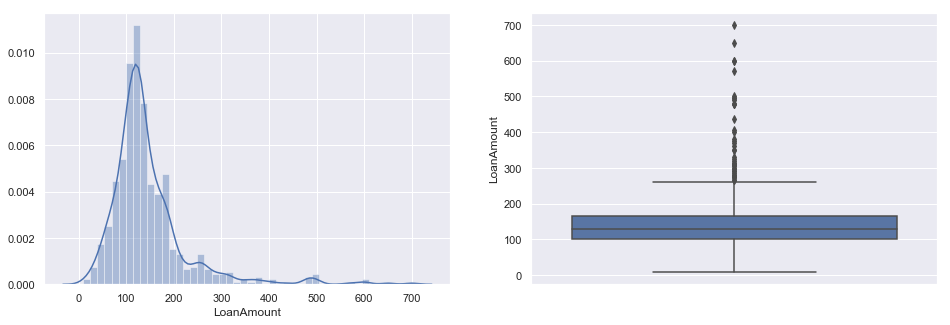

In [24]:
plt.figure(figsize=(16,5)) 
plt.subplot(121) 
sns.distplot(data['LoanAmount'])
plt.subplot(122) 
sns.boxplot(y=data['LoanAmount'])

##### --> There is lot of outliers in LaonAmount and the distribution is fairly normal.

## Bivariate Analysis

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235
All          0.312704  0.687296


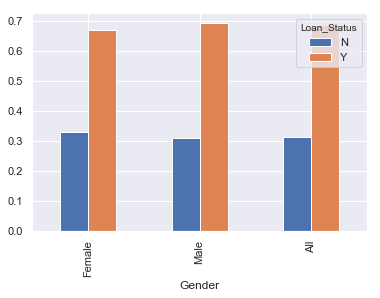

In [25]:
Gender = pd.crosstab(index=data['Gender'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Gender)
Gender.plot.bar()

##### --> The proportion of male and female applicants is more or less same for both approved and unapproved loans

In [26]:
Married = pd.crosstab(index=data['Married'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Married)

Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.281796  0.718204
All          0.312704  0.687296


In [27]:
Dependents = pd.crosstab(index=data['Dependents'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Dependents)

Loan_Status         N         Y
Dependents                     
0            0.313889  0.686111
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059
All          0.312704  0.687296


In [28]:
Education = pd.crosstab(index=data['Education'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Education)

Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940
All           0.312704  0.687296


In [29]:
Self_Employed = pd.crosstab(index=data['Self_Employed'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Self_Employed)

Loan_Status           N         Y
Self_Employed                    
No             0.312030  0.687970
Yes            0.317073  0.682927
All            0.312704  0.687296


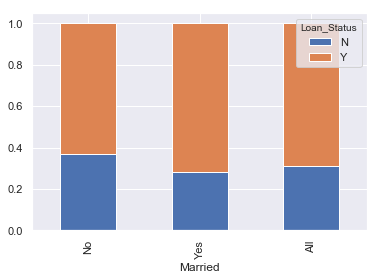

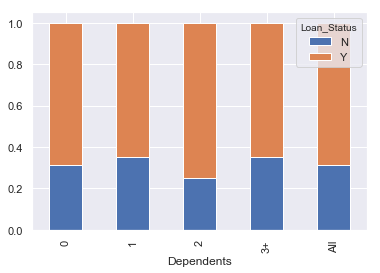

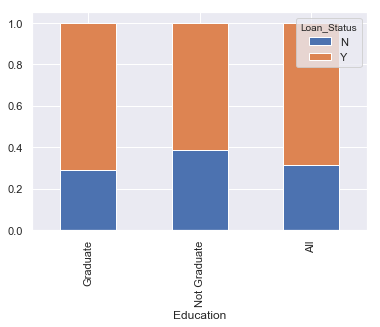

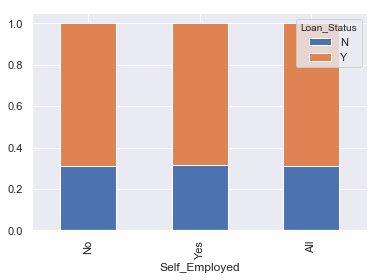

In [30]:
Married.plot.bar(stacked=True)
Dependents.plot.bar(stacked=True)
Education.plot.bar(stacked=True)
Self_Employed.plot.bar(stacked=True)

##### --> Proportion of married applicants is higher for the approved loans.
##### --> Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
##### --> Graduates have more chances of getting loan approval as compared to non-graduates.
##### --> There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

In [31]:
Credit_History = pd.crosstab(index=data['Credit_History'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Credit_History)

Loan_Status            N         Y
Credit_History                    
0.0             0.921348  0.078652
1.0             0.209524  0.790476
All             0.312704  0.687296


In [32]:
Property_Area = pd.crosstab(index=data['Property_Area'],columns=data['Loan_Status'],margins=True,normalize='index')
print(Property_Area)

Loan_Status           N         Y
Property_Area                    
Rural          0.385475  0.614525
Semiurban      0.231760  0.768240
Urban          0.341584  0.658416
All            0.312704  0.687296


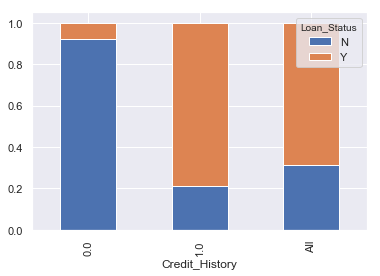

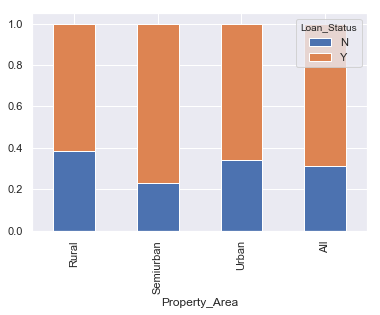

In [33]:
Credit_History.plot.bar(stacked=True)
Property_Area.plot.bar(stacked=True)

##### --> people with credit history as 1 are more likely to get their loans approved.
##### --> Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

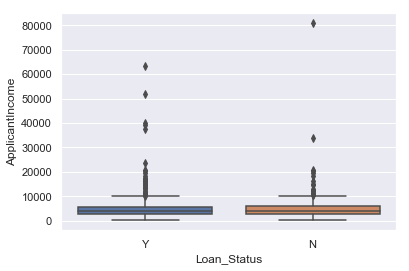

In [34]:
sns.boxplot(y=data['ApplicantIncome'],x=data['Loan_Status'])

##### --> There is similar range of Applicant's Income for both approved and non-approved loans

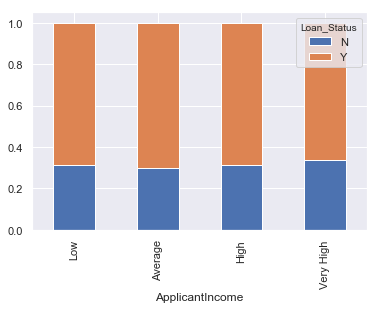

In [35]:
Income_bin = pd.cut(data['ApplicantIncome'], bins=[0,2500,4000,6000,81000], labels=['Low','Average','High','Very High'])
pd.crosstab(Income_bin,data['Loan_Status'],normalize='index').plot.bar(stacked=True)

##### --> It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

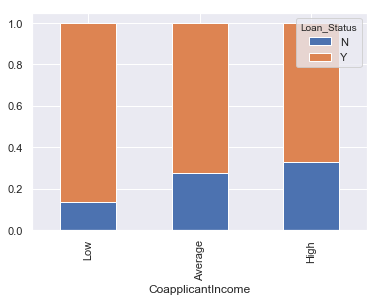

In [36]:
Coapplicant_bin = pd.cut(data['CoapplicantIncome'], bins=[0,1000,3000,42000], labels=['Low','Average','High'])
pd.crosstab(Coapplicant_bin, data['Loan_Status'], normalize='index').plot.bar(stacked=True)

##### --> It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right.
##### The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it.

#### Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

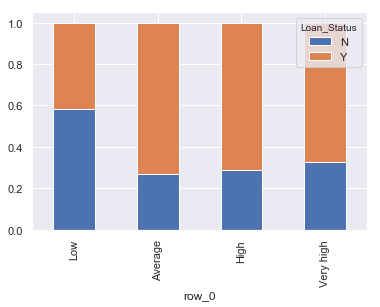

In [37]:
Total_Income = data['ApplicantIncome'] + data['CoapplicantIncome']
total = pd.cut(Total_Income, bins=[0,2500,4000,6000,81000], labels=['Low','Average','High', 'Very high'])
pd.crosstab(total, data['Loan_Status'], normalize='index').plot.bar(stacked=True)

##### --> Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

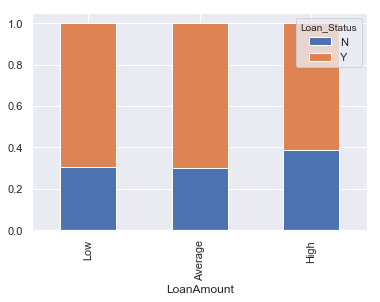

In [38]:
LoanAmount_bin = pd.cut(data['LoanAmount'], bins=[0,100,200,700], labels=['Low','Average','High'])
pd.crosstab(LoanAmount_bin, data['Loan_Status'], normalize='index').plot.bar(stacked=True)

##### --> proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount

Text(0.5, 0, 'EMI')

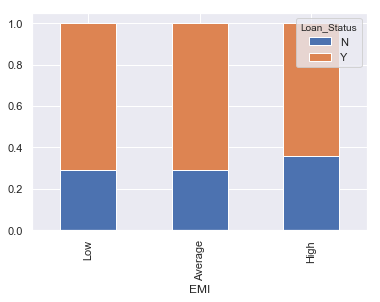

In [39]:
EMI = data['LoanAmount']/data['Loan_Amount_Term']*1000
EMI_bin = pd.cut(EMI, bins=[0,350,450,9250], labels=['Low','Average','High'])
pd.crosstab(EMI_bin, data['Loan_Status'], normalize='index').plot.bar(stacked=True)
plt.xlabel('EMI')

##### --> Proportion of approved loans is higher for Low and Average EMI as compared to that of High EMI

In [40]:
data['Loan_Status'].replace('Y',1,inplace=True)
data['Loan_Status'].replace('N',0,inplace=True)

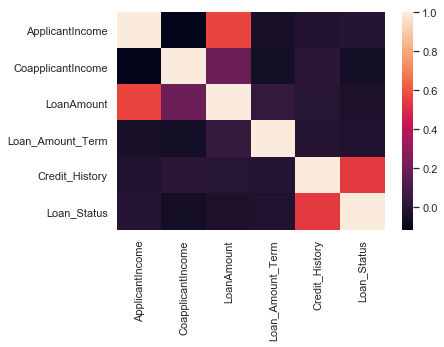

In [41]:
matrix = data.corr()
sns.heatmap(matrix)

##### Most correlated varaibles are:
##### --> Loan_Amount vs Loan_Status
##### --> Credit_History vs Loan_Status

### One-Hot Encoding

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [43]:
data['Gender']=pd.get_dummies(data['Gender'],drop_first=True)

In [44]:
data['Married']=pd.get_dummies(data['Married'],drop_first=True)

In [45]:
data['Dependents']=pd.get_dummies(data['Dependents'],drop_first=True)

In [46]:
data['Education']=pd.get_dummies(data['Education'],drop_first=True)

In [47]:
data['Self_Employed']=pd.get_dummies(data['Self_Employed'],drop_first=True)

In [48]:
data['Property_Area']=pd.get_dummies(data['Property_Area'],drop_first=True)

In [49]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1


## Importing Test data

In [50]:
test_data = pd.read_csv("test_data")

In [51]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [52]:
test_data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP002195,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


In [53]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [54]:
test_data['Gender'].fillna(test_data['Gender'].value_counts().index[0],inplace=True)
test_data['Gender'].value_counts()

Male      297
Female     70
Name: Gender, dtype: int64

In [55]:
test_data['Dependents'].fillna(test_data['Dependents'].value_counts().index[0],inplace=True)
test_data['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [56]:
test_data['Self_Employed'].fillna(test_data['Self_Employed'].value_counts().index[0],inplace=True)
test_data['Self_Employed'].value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [57]:
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(),inplace=True)
test_data['LoanAmount'].isna().sum()

0

In [58]:
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].value_counts().index[0],inplace=True)
test_data['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [59]:
test_data['Credit_History'].fillna(test_data['Credit_History'].value_counts().index[0],inplace=True)
test_data['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [60]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [61]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [62]:
test_data['Gender']=pd.get_dummies(test_data['Gender'],drop_first=True)
test_data['Married']=pd.get_dummies(test_data['Married'],drop_first=True)
test_data['Dependents']=pd.get_dummies(test_data['Dependents'],drop_first=True)
test_data['Education']=pd.get_dummies(test_data['Education'],drop_first=True)
test_data['Self_Employed']=pd.get_dummies(test_data['Self_Employed'],drop_first=True)
test_data['Property_Area']=pd.get_dummies(test_data['Property_Area'],drop_first=True)

In [63]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,0
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,0
2,LP001031,1,1,0,0,0,5000,1800,208.0,360.0,1.0,0
3,LP001035,1,1,0,0,0,2340,2546,100.0,360.0,1.0,0
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,0


In [64]:
test = test_data.iloc[:,1:]

## Model Selection

In [65]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
LR = LogisticRegression()
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
GNB = GaussianNB()
BNB = BernoulliNB()

In [69]:
models = [LR, DTC, RFC, GNB, BNB]

In [70]:
for model in models:
    print('Model Name:', model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

Model Name: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.8324324324324325
[[ 22  29]
 [  2 132]]

Model Name: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7027027027027027
[[ 30  21]
 [ 34 100]]

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### --> After comparing the models, Logistic Regression gives the best accuracy score 83.24 %

In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)
test_pred = model.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
Submission = pd.DataFrame({'Loan_ID': test_data['Loan_ID'], 'Loan_Status':test_pred})
Submission.to_csv('Logistic.csv')